In [4]:
#importing requ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats 
from scipy.stats.stats import pearsonr
import math
import statsmodels.api as sm

### Reading into the data set

In [5]:
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [6]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [7]:
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

### Miniminum and Maximum Salaries earned 

In [8]:
max_min = df['salary'].describe().loc[['min','max']]
max_min

min    29000.0
max    96156.0
Name: salary, dtype: float64

- The minimum salary earned is 29000 with the maximum being 96156

### Mean and Standard error mean

In [9]:
salary_mean = np.mean(df['salary'])
round(salary_mean, 2)

50863.22

- the mean salary earned is 50863. this means 

In [9]:
df['salary'].sem()

560.0622753925232

### Standard deviation

In [10]:
np.std(df['yearsworked'])

9.435503224576884

### Interquartile range

In [11]:
q2 = df['salary'].median()
q2

50096.0

In [12]:
q1 = df["salary"].quantile(0.25)
q3 = df["salary"].quantile(0.75)
iqr = q3 - q1
iqr

20345.0

### Re-assigning

In [13]:
new_name = {'Gender': {0:'Women', 1:'Men'} }
df.replace(new_name, inplace=True)


### Count of different gender

In [15]:
total_gender = df['male'].value_counts()
total_gender
table = {'Men': [386], 'Women': [128]}

In [16]:
x = {'Men': [386], 'Women': [128]}
table = pd.DataFrame(data=table)
table

,Men,Women
0,386,128


### Executives comparisons

In [17]:
df0 = df[(df['position']==3) & (df['male']=='Women')]
df0.male.value_counts()
print(f'There are {len(df0)} Women executives')


There are 19 Women executives


In [18]:
df1 = df[(df['position']==3) & (df['male']=='Men')]
df1.male.value_counts()
print(f'There are {len(df1)} Men executives')

There are 192 Men executives


In [19]:
df2 = len(df1) - len(df0)
df2
print(f'They are {(df2)} more Men executives compared to Women')

They are 173 more Men executives compared to Women


### A histogram that describes the distribution for Salary

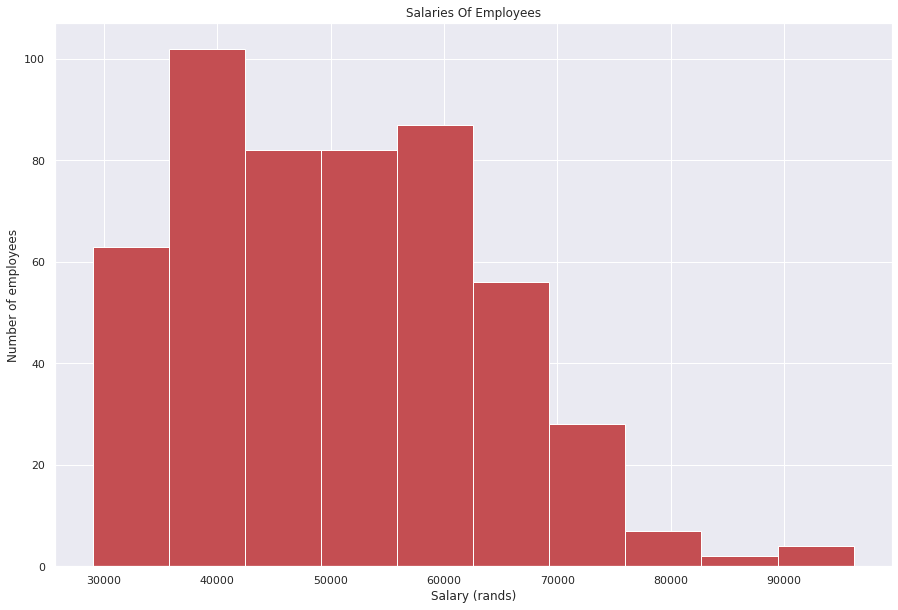

In [31]:
sns.set()
plt.figure(figsize=(15,10))
plt.hist(df['salary'], color='r', stacked=False, orientation='vertical')
plt.xlabel('Salary (rands)')
plt.ylabel('Number of employees')
plt.title('Salaries Of Employees')
plt.show()

- It is evenly distributed between 43000 and 55000. This means that a bulk of the employees earn salaries between the range of 43000 and 55000

### 11. A bar graph to show the different average salaries of men and women

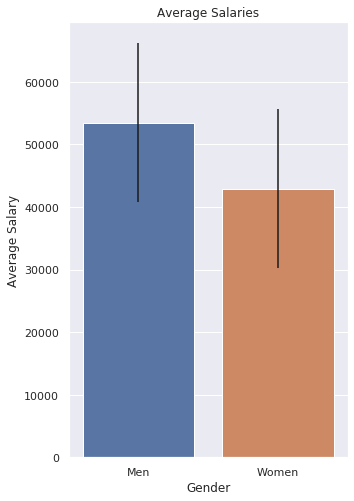

In [21]:
average_salary = df['salary'].groupby(df['male']).mean()
average_salary = average_salary.to_frame()
average_salary.index = ['Men','Women']
std_s = df['salary'].std()
plt.figure(figsize=(5,8))
sns.barplot(x=average_salary.index, y="salary", data=average_salary, yerr=std_s)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Average Salaries')

plt.show()

- On average Men earn more than Women, which means that generally Men hold more executive positions than Women.
- The SEM shows how much the spread would be affected by addition and reduction of variables.

### 12. A scatterplot showing the relationship between Years Worked and Salary.

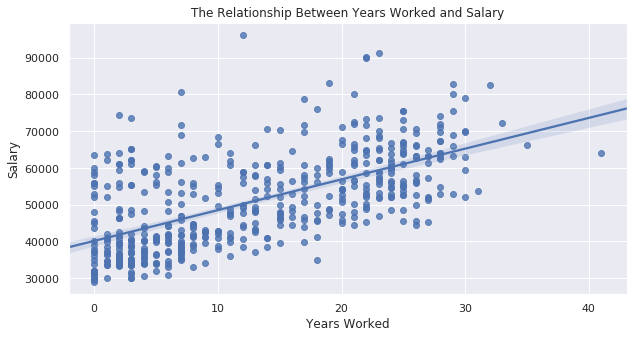

In [22]:
plt.figure(figsize=(10,5))
sns.regplot(x=df['yearsworked'], y=df['salary'], data=df)
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('The Relationship Between Years Worked and Salary')
plt.show()

- The trend line is positively correlated, which implies the median is between 39000 and 40 000.
- As the Years worked increase so does the salary earned.
- The outliers do not affect the mean significantly.
- They have worked there for less years but they are more than the others. 

### 13. The Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary 

In [29]:
# replacing the null value
new = df.fillna(0)

In [30]:
p = pearsonr(new['yearsworked'], new['salary'])
print(p)

(0.6069484208479918, 4.765231027448406e-53)


- There is a moderate positive relationship which then implies that the increase in years worked moderately propotional salaries earned.  
- The corresponding p value indicates strong evidence against the null hypothesis-the null hypothesis is there isn't a correlation between salaries earned and the number of years worked.